In [1]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

# Центральная предельная теорема

Сгенерируем выборку размером 1000 из Бета распределения
$$Beta(\alpha = 2.31, \beta = 0.627)$$

In [2]:
a = 2.31; b = 0.627
dist = beta(a, b)
sample = dist.rvs(1000)

Математическое ожидание и дисперсия для Бета распределения: $$
E[X] = \frac{\alpha + \beta}{\beta} 
\quad D[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
$$ Построим теоретическое нормальное распределение для этих характеристик.

In [3]:
normal = norm(a / (a + b), (a * b / (a + b)**2 / (a + b + 1))**0.5)

Отобразим это на графике.

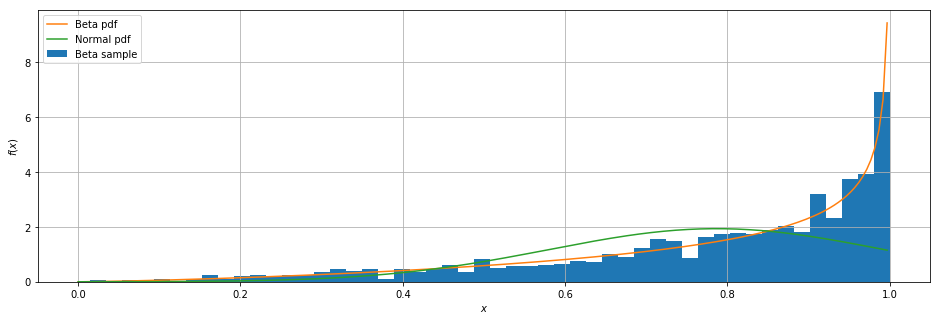

In [4]:
x = np.linspace(dist.ppf(0), dist.ppf(0.95), 200)

plt.figure(figsize=(16, 5))
plt.hist(sample, 50, density=True, label='Beta sample')
plt.plot(x, dist.pdf(x), label='Beta pdf')
plt.plot(x, normal.pdf(x), label='Normal pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

Сгенерируем 1000 выборок размерами 1, 2, 4,... 512 и найдем для них среднее. И построим теоретические нормальные распределения, аппроксимирующих выборочные средние. $$
N(\mu = E[X], \sigma = \sqrt{\frac{D[X]}{n}})
$$

Визуализируем результаты на графиках для каждого размера выборок.

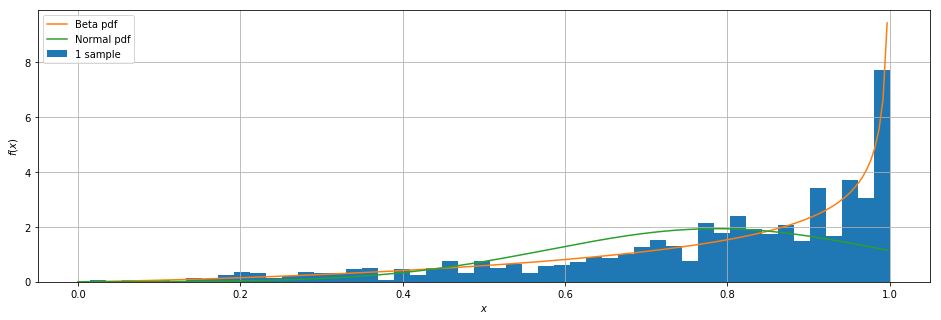

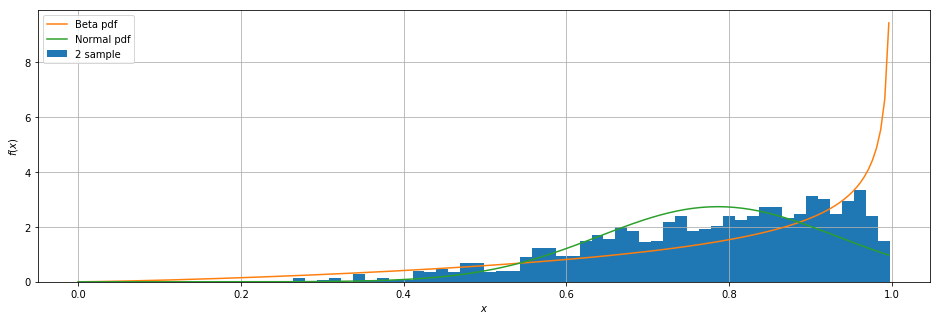

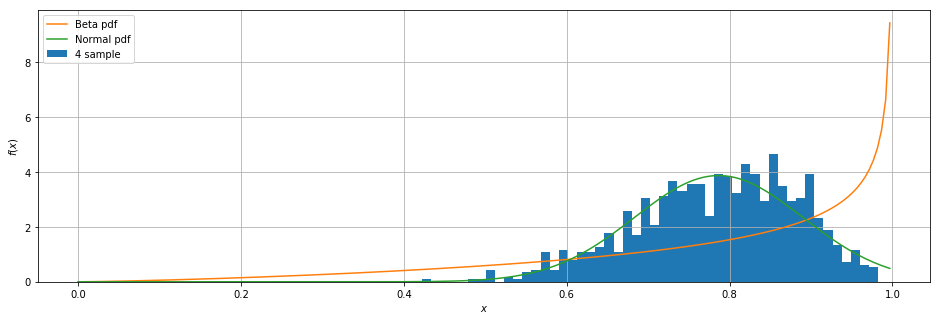

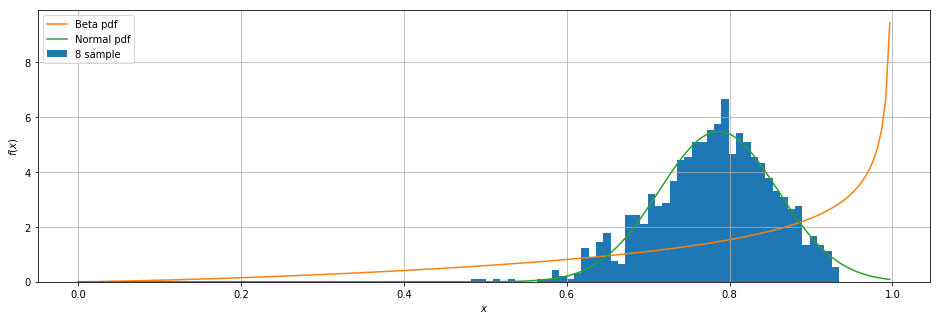

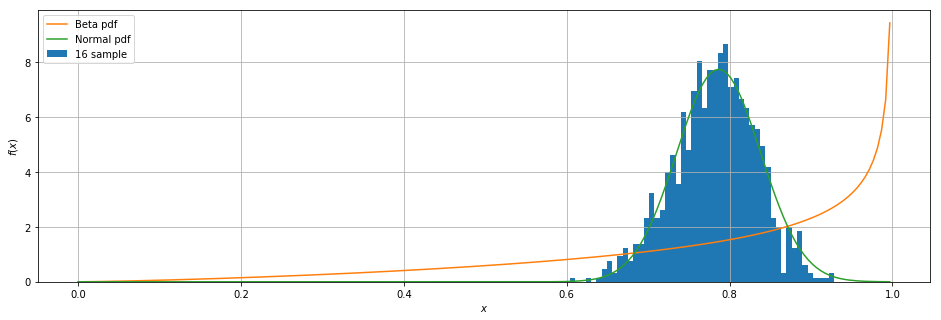

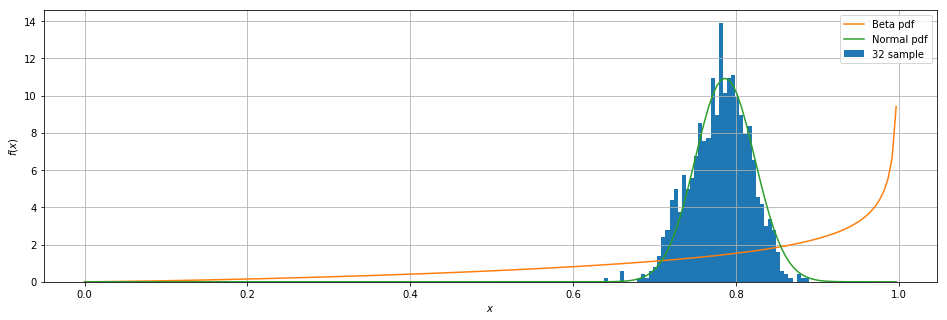

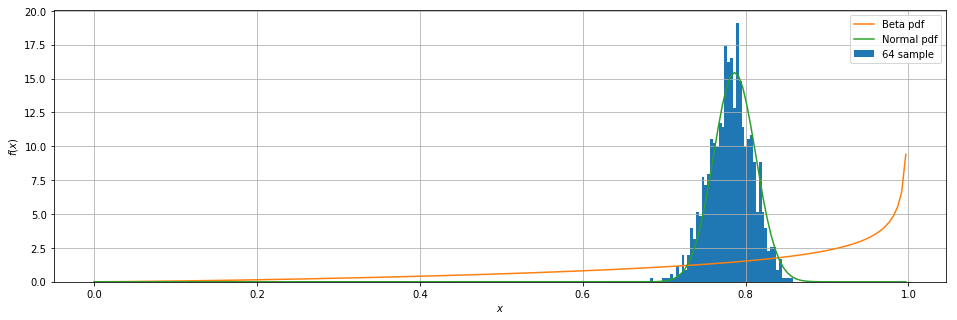

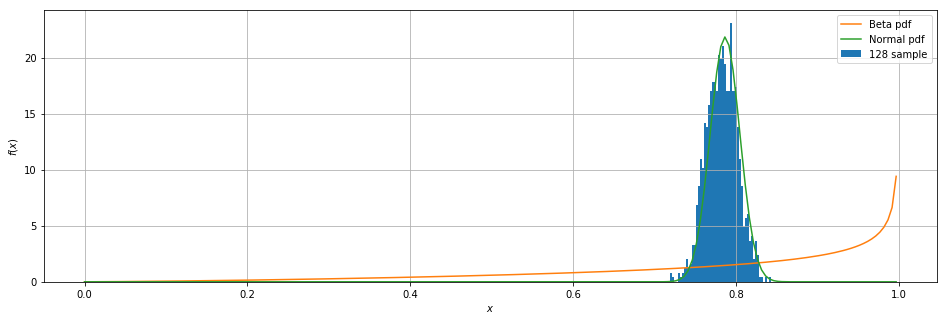

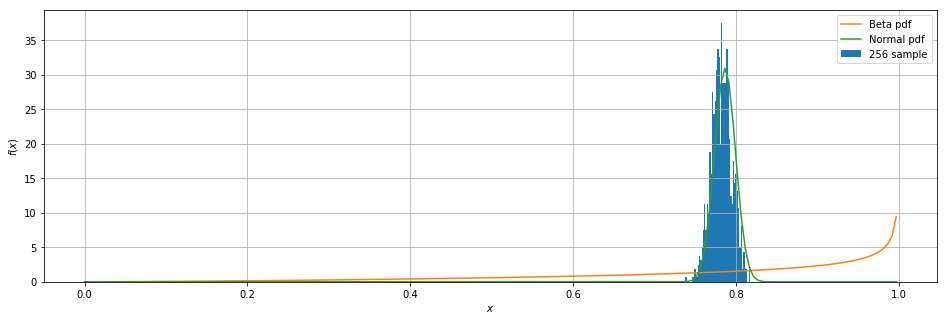

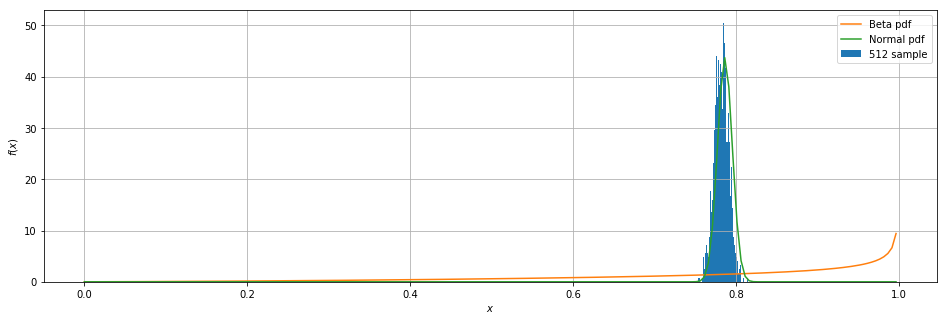

In [5]:
for n in (2**i for i in range(10)):
    s = [sum(np.random.choice(sample, n)) / n for i in range(1000)]
    normal = norm(a / (a + b), (a * b / (a + b)**2 / (a + b + 1) / n)**0.5)

    plt.figure(figsize=(16, 5))
    plt.hist(s, 50, density=True, label=f'{n} sample')
    plt.plot(x, dist.pdf(x), label='Beta pdf')
    plt.plot(x, normal.pdf(x), label='Normal pdf')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid(True)
    plt.legend()

**Вывод**: На графиках наглядно видно, как с ростом размера выборки отклонение от математического ожидания все меньше и меньше. 
При этом гистограмма выбоки все точнее вписывается в теоретическое нормальное распределение, что подтверждает центральную предельную теорему.